# 🧠 Primeros pasos con TensorFlow/Keras

Este cuaderno te ayudará a dar tus primeros pasos en el mundo del aprendizaje automático con TensorFlow y Keras, desde lo más básico hasta un reto intermedio final.

## 0. Instalación y comprobación

Si no tienes tensorflow instalado, ejecuta la siguiente celda:

In [1]:
!pip install tensorflow

Importamos las librerías necesarias y comprobamos la versión de TensorFlow.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print("TensorFlow versión:", tf.__version__)


TensorFlow versión: 2.18.0


## 1. Cargando y explorando datos

Vamos a trabajar con el dataset MNIST, que contiene imágenes de dígitos escritos a mano.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de test: (10000, 28, 28)


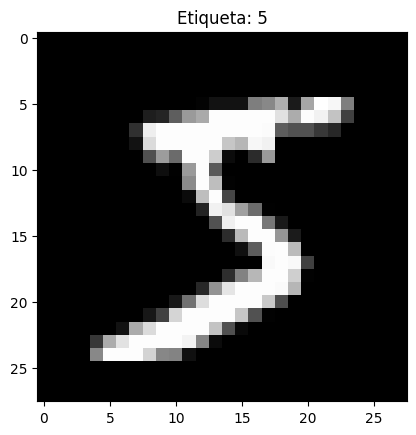

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de test:", x_test.shape)

import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")
plt.title(f"Etiqueta: {y_train[0]}")
plt.show()


## 2. Preprocesamiento: Normalización de datos

Las redes neuronales aprenden mejor si los datos de entrada están entre 0 y 1.

In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0


## 3. Construcción de tu primer modelo

Un modelo en Keras es una secuencia de capas. Empezamos por un modelo simple.

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


## 4. Compilación del modelo

Aquí decidimos cómo aprenderá el modelo.

In [21]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## 5. Entrenamiento del modelo

In [22]:
history = model.fit(x_train[:10000], y_train[:10000], epochs=20)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3366 - loss: 2.0125
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7622 - loss: 0.7786
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8407 - loss: 0.5496
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8704 - loss: 0.4537
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8799 - loss: 0.4135
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8946 - loss: 0.3608
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8999 - loss: 0.3415
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9121 - loss: 0.3188
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9155 - loss: 0.3014
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9199 - loss: 0.2908
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9168 - loss: 0.2837
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

## 6. Evaluación y predicción

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9524 - loss: 0.1914
Precisión en test: 0.959
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicción para la primera imagen: 7


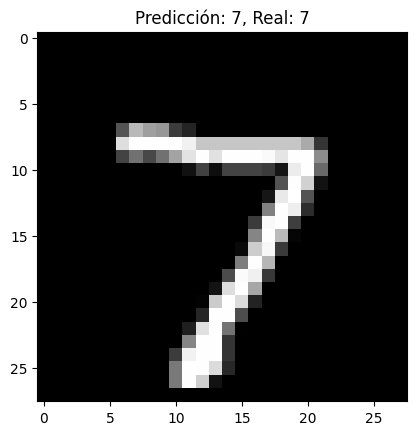

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.3f}")

predictions = model.predict(x_test)
print("Predicción para la primera imagen:", np.argmax(predictions[0]))

import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap="gray")
plt.title(f"Predicción: {np.argmax(predictions[0])}, Real: {y_test[0]}")
plt.show()


## 7. Ejercicio guiado 1

> **Tarea:**  
> - Cambia el número de épocas a 10 y vuelve a entrenar.  
> - ¿Qué sucede con la precisión?  
> - Prueba usando solo los primeros 10,000 ejemplos de entrenamiento (`x_train[:10000]`). ¿Notas algún cambio?

*La precisión aumenta al cambiar el número de épocas a 10.*

*No significativamente pero, al usar tan pocos ejemplos, la precisión baja levemente.*

## 8. Modificando la arquitectura (Ejercicio guiado 2)

> **Tarea:**  
> - Cambia la capa oculta a 64 neuronas.  
> - ¿Cambia la precisión?
> - Vuelve a probar, pero ahora pon 256 neuronas.  
> - Comenta tus observaciones.

*La precisión baja al cambiar la capa oculta a 64 y aumenta el usar 256.*

## 9. Añadiendo más capas (Ejercicio guiado 3)

> **Tarea:**  
> - Añade una segunda capa oculta de 64 neuronas (`Dense(64, activation='relu')`).  
> - Entrena durante 10 épocas y prueba batch_size=64.  
> - Cambia batch_size a 32 y 128 y observa la diferencia en velocidad/precisión.  
> - ¿Qué ocurre si entrenas solo 3 épocas? ¿Y si usas 20?

*La velocidad baja al usar un batch_size pequeño; incluso con 20 épocas se trata de un proceso rápido.*

## 10. Guardar y cargar modelos (Ejercicio guiado 4)

In [28]:
# Guardar modelo
model.save('mi_segundo_modelo.keras')

import matplotlib.pyplot as plt
import numpy as np

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicción de la imagen 10: 0
Etiqueta real: 0


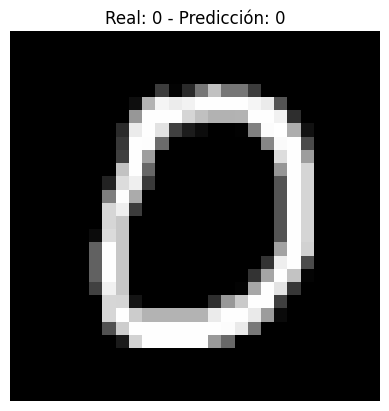

In [32]:
# Cargar modelo
nuevo_modelo = keras.models.load_model('mi_segundo_modelo.keras')

# Predecir con el modelo cargado
predicciones = nuevo_modelo.predict(x_test)

# Elegir otra imagen de test (el 6)
indice = 10
imagen = x_test[indice]
etiqueta_real = y_test[indice]

# Mostrar predicción
prediccion = np.argmax(predicciones[indice])
print(f"Predicción de la imagen {indice}: {prediccion}")
print(f"Etiqueta real: {etiqueta_real}")

# Mostrar la imagen
plt.imshow(imagen, cmap='gray')
plt.title(f"Real: {etiqueta_real} - Predicción: {prediccion}")
plt.axis('off')
plt.show()

> **Tarea:**  
> - Cambia el nombre del archivo al guardar el modelo y verifica que puedes cargarlo correctamente.  
> - Elige otra imagen de test y muestra la predicción junto con la imagen y la etiqueta real.

## 11. Ejercicio práctico sencillo (no guiado)

Utiliza el dataset `fashion_mnist` de Keras (imágenes de ropa), crea y entrena un modelo similar, evalúa la precisión y muestra la predicción de varias imágenes.

> **Pistas:**  
> - El dataset se carga así:
>   ```python
>   fashion_mnist = keras.datasets.fashion_mnist
>   (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
>   ```
> - Preprocesa los datos como antes.
> - Las etiquetas representan distintos tipos de ropa (0: camiseta, 1: pantalón, etc).

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7825 - loss: 0.6271
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8612 - loss: 0.3823
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8758 - loss: 0.3391
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8855 - loss: 0.3091
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8918 - loss: 0.2961
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8719 - loss: 0.3557

Precisión en el conjunto de prueba: 0.8707000017166138
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


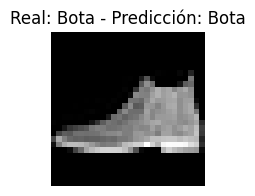

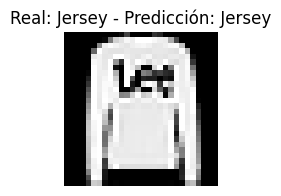

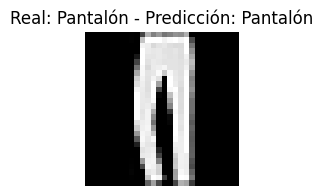

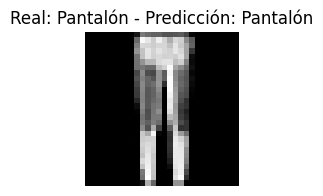

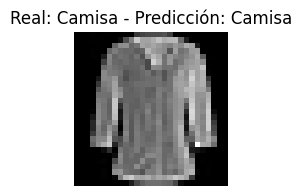

In [34]:
# Cargar dataset Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Clases del dataset
clases = ['Camiseta/top', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
          'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

# Normalizar valores entre 0 y 1 (le es más fácil)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Crear el modelo
modelo = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases
])

# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(x_train, y_train, epochs=5)

# Evaluar el modelo
test_loss, test_acc = modelo.evaluate(x_test, y_test)
print('\nPrecisión en el conjunto de prueba:', test_acc)

# Hacer predicciones
predicciones = modelo.predict(x_test)

# Mostrar varias imágenes con predicciones
num_imagenes = 5
for i in range(num_imagenes):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[i], cmap='gray')
    pred = np.argmax(predicciones[i])
    real = y_test[i]
    plt.title(f"Real: {clases[real]} - Predicción: {clases[pred]}")
    plt.axis('off')
    plt.show()

## 12. Reto medio: Clasificador multiclase personalizado (MNIST)

Crea un clasificador para distinguir solo tres dígitos de MNIST (por ejemplo: 3, 5 y 7).

> **Instrucciones:**
> - Filtra los datos para quedarte solo con las imágenes y etiquetas de los tres dígitos elegidos.
> - Preprocesa los datos como siempre.
> - Crea y entrena un modelo (recuerda que la capa de salida debe tener 3 neuronas y softmax).
> - Cambia las etiquetas originales (3, 5, 7) a (0, 1, 2).
> - Evalúa la precisión del modelo y muestra la predicción de algunas imágenes junto a la etiqueta real.
>
> **Pista para filtrar datos:**
> ```python
> digitos = [3, 5, 7]
> indices_train = np.isin(y_train, digitos)
> indices_test = np.isin(y_test, digitos)
>
> x_train_filtrado = x_train[indices_train]
> y_train_filtrado = y_train[indices_train]
> x_test_filtrado = x_test[indices_test]
> y_test_filtrado = y_test[indices_test]
> ```
> - Para reasignar etiquetas puedes usar:
> ```python
> mapeo = {3:0, 5:1, 7:2}
> y_train_filtrado = np.vectorize(mapeo.get)(y_train_filtrado)
> y_test_filtrado = np.vectorize(mapeo.get)(y_test_filtrado)
> ```

Epoch 1/5
557/557 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9197 - loss: 0.2252
Epoch 2/5
557/557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9802 - loss: 0.0615
Epoch 3/5
557/557 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0393
Epoch 4/5
557/557 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9915 - loss: 0.0272
Epoch 5/5
557/557 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9948 - loss: 0.0183
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0501

Precisión del modelo en test: 0.99
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


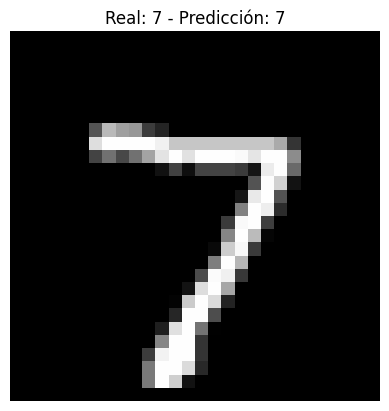

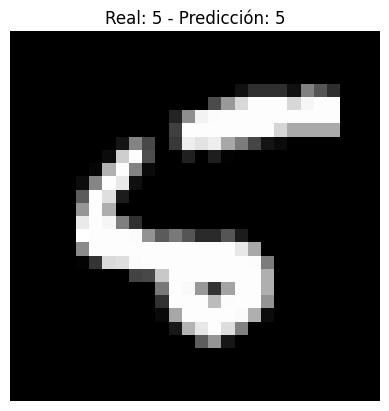

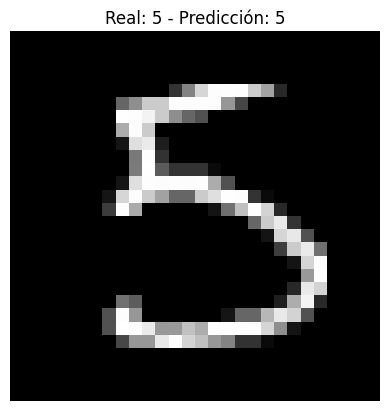

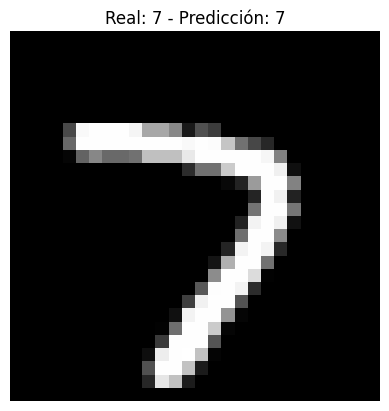

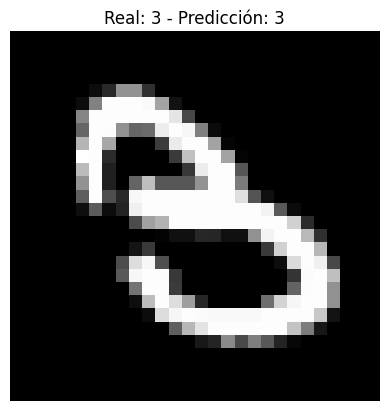

In [35]:
# Cargar dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Digitos a clasificar
digitos = [3, 5, 7]

# Filtrar imágenes que sean solo 3, 5 o 7
indices_train = np.isin(y_train, digitos)
indices_test = np.isin(y_test, digitos)

x_train_filtrado = x_train[indices_train]
y_train_filtrado = y_train[indices_train]
x_test_filtrado = x_test[indices_test]
y_test_filtrado = y_test[indices_test]

# Reasignar etiquetas: 3 → 0, 5 → 1, 7 → 2
mapeo = {3: 0, 5: 1, 7: 2}
y_train_filtrado = np.vectorize(mapeo.get)(y_train_filtrado)
y_test_filtrado = np.vectorize(mapeo.get)(y_test_filtrado)

# Normalizar imágenes
x_train_filtrado = x_train_filtrado / 255.0
x_test_filtrado = x_test_filtrado / 255.0

# Crear modelo
modelo = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Solo 3 clases
])

# Compilar
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Entrenar
modelo.fit(x_train_filtrado, y_train_filtrado, epochs=5)

# Evaluar
loss, acc = modelo.evaluate(x_test_filtrado, y_test_filtrado)
print(f"\nPrecisión del modelo en test: {acc:.2f}")

# Predecir algunas imágenes
predicciones = modelo.predict(x_test_filtrado)

# Mostrar algunas imágenes con predicciones
clases = ['3', '5', '7']
for i in range(5):
    plt.imshow(x_test_filtrado[i], cmap='gray')
    pred = np.argmax(predicciones[i])
    real = y_test_filtrado[i]
    plt.title(f"Real: {clases[real]} - Predicción: {clases[pred]}")
    plt.axis('off')
    plt.show()

## 13. (Opcional) Ideas de ampliación

- Ajusta el número de capas y neuronas, o añade Dropout (desactivación de neuronas aleatoriamente).
- Visualiza imágenes mal clasificadas.
- Prueba otras funciones de activación u optimizadores.

---

> **¡Enhorabuena! Has completado tu primera introducción práctica a TensorFlow/Keras.**

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Número de errores: 35


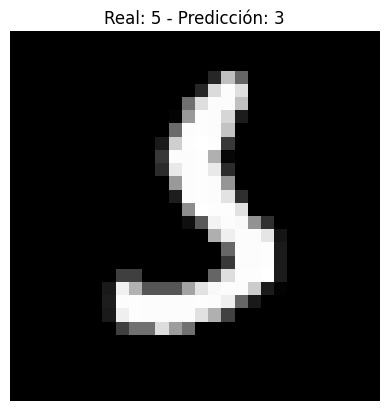

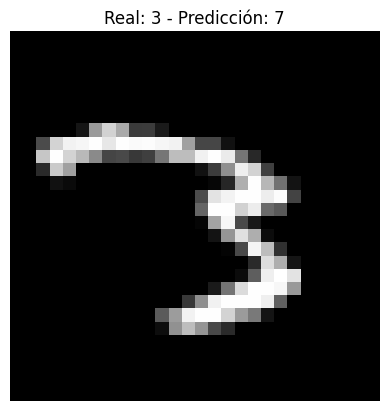

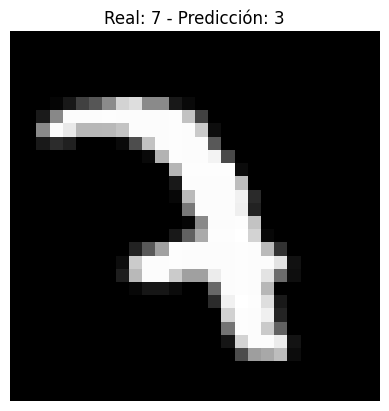

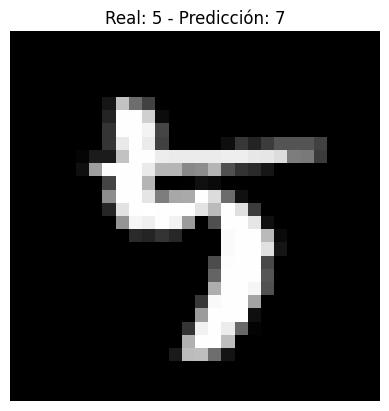

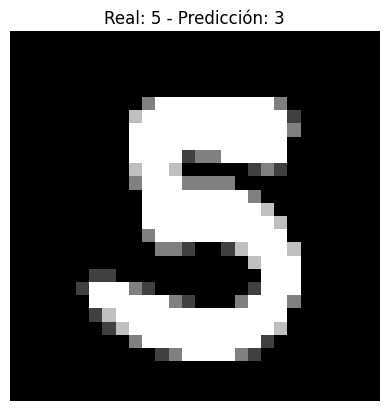

In [38]:
# Ver las mal clasificadas del anterior:

# Obtener predicciones
predicciones = modelo.predict(x_test_filtrado)
pred_clases = np.argmax(predicciones, axis=1)

# Encontrar índices donde la predicción fue incorrecta
errores = np.where(pred_clases != y_test_filtrado)[0]

# Clases originales mapeadas
clases = ['3', '5', '7']

print(f"Número de errores: {len(errores)}")

# Mostrar las primeras 5 imágenes mal clasificadas
for i in errores[:5]:
    plt.imshow(x_test_filtrado[i], cmap='gray')
    real = y_test_filtrado[i]
    pred = pred_clases[i]
    plt.title(f"Real: {clases[real]} - Predicción: {clases[pred]}")
    plt.axis('off')
    plt.show()